# Inteligência Artificial: Model LifeCycle [24E3_1]

## Alberto Fontenelle Pluecker - 17.08.24

Link para este notebook: https://colab.research.google.com/drive/1rnzCY7nzHmiFSRTgKP-od5htq7F17fjg?usp=sharing

### I. Preparação do Conjunto de Dados

1. Escreva uma função chamada preparar_dataset_sklearn, a qual recebe como parâmetro um dos Conjunto de Dados (datasets) do sklearn e retorna um DataFrame pandas onde a última coluna é o target e as demais colunas são os atributos.

2. Considere uma versão modificada da função do Exercício 1 chamada preparar_dataset. Assuma que tal função também recebe um arquivo csv, ao invés de um dataset sklearn, como entrada. Responda as questões abaixo:

  - Quais os parâmetros da função preparar_dataset?
    - `path`: caminho para o arquivo `.csv` com os dados
    - `target_column` nome/índice da coluna com a classe alvo
  - Descreva os passos executados pela função até retornar o DataFrame.
    1. carregar `.csv` em um DataFrame pandas
    2. separar a coluna especificada
    3. reorganizar o DataFrame para que a coluna alvo seja a última
    4. retornar o DataFrame


In [47]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.utils import Bunch

# Exercício 1
def preparar_dataset_sklearn(dataset: Bunch) -> pd.DataFrame:
    data = dataset.data
    target = dataset.target
    columns = list(dataset.feature_names) + ['target']
    return pd.DataFrame(data=np.c_[data, target], columns=columns)

# Exercício 2
def preparar_dataset(path: str, target_column: str) -> pd.DataFrame:
    df = pd.read_csv(path)
    if isinstance(target_column, str):
        target = df[target_column]
    else:
        target = df.iloc[:, target_column]
    df = df.drop(columns=[target_column])
    df['target'] = target
    return df

iris = preparar_dataset("sample_data/Iris.csv", "Species")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,target
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [73]:
df_wine = preparar_dataset_sklearn(datasets.load_wine())
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


### II. Construção de Classificador K-NN

3. Escreva uma função chamada construir_classificador_knn. A função recebe um DataFrame pandas contendo o Conjunto de Dados obtido do Exercício 1, o valor do parâmetro K do K-NN e o tamanho do conjunto de treinamento em porcentagem. A função retorna um modelo classificador K-NN treinado e pronto para realizar previsões.

4. Considere uma versão modificada da função do Exercício 3 chamada construir_classificador. Considere também que existem diversos outros métodos de Classificação para Aprendizagem de Máquina diferentes do K-NN e que cada método possui diferentes parâmetros em quantidades diferentes. Um dos parâmetros da função construir_classificador é uma string contendo o tipo de classificador. Responda as questões abaixo:

    - Quais os parâmetros da função construir_classificador? Indique na sua resposta como você resolveria o problema de cada classificador possuir parâmetros diferentes.
      - `df`: DataFrame contendo os dados.
      - `classifier_type`: String indicando o tipo de classificador, por exemplo, 'knn', 'svm', 'tree'
      - `params`: Dicionário contendo os parâmetros específicos para o classificador escolhido.
      - `train_size`: Percentual dos dados que será utilizado para treinamento.

      O parâmetro `params` é um dicionário que armazena os parâmetros específicos de cada classificador. Quando o classificador é escolhido, os parâmetros são passados para a função de criação do classificador correspondente usando o operador `**` para expandir o dicionário.
    - Descreva os passos executados pela função até retornar o modelo  Classificador.
      1. separar os atributos (X) e o alvo (y) do DataFrame.
      2. dividir o conjunto de dados em conjuntos de treinamento e teste utilizando `train_test_split`.
      3. Com base no valor de `classifier_type`, o classificador apropriado é escolhido. Parâmetros específicos do classificador são passados através do dicionário `params`.
      4. treinar o classificador utilizando os dados de treinamento (X_train, y_train).
      5. retornar o modelo treinado, o conjunto de teste (X_test) e os valores reais do conjunto de teste (y_test).


In [74]:
# Exercício 3
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

def construir_classificador_knn(df: pd.DataFrame, k: int, train_size: float):
    X = df.iloc[:, :-1]  # Atributos
    y = df.iloc[:, -1]   # Target
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    return model, X_test, y_test


model, X_test, y_test = construir_classificador_knn(sk_iris, 3, 0.8)

# Exercício 4
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from typing import Dict

def construir_classificador(df: pd.DataFrame, classifier_type: str, params: Dict, train_size: float):
    X = df.iloc[:, :-1]  # Atributos
    y = df.iloc[:, -1]   # Target
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, random_state=42)

    if classifier_type == 'knn':
        model = KNeighborsClassifier(**params)
    elif classifier_type == 'svm':
        model = SVC(**params)
    elif classifier_type == 'tree':
        model = DecisionTreeClassifier(**params)
    else:
        raise ValueError("Tipo de classificador não suportado")

    model.fit(X_train, y_train)
    return model, X_test, y_test

params_knn = {'n_neighbors': 3}
model_knn, X_test_knn, y_test_knn = construir_classificador(df_wine, 'knn', params_knn, 0.8)


### III. Avaliação de Classificador K-NN

5. Escreva uma função chamada avaliar_acuracia_knn. A função recebe um modelo K-NN treinado, um conjunto de teste e um valor N de repetições como entrada e retorna a médias das acurácias para N repetições como saída.

6. A função avaliar_acuracia_knn poderia avaliar de maneira eficaz um Regressor K-NN? Justifique sua resposta.
  - A função avaliar_acuracia_knn não poderia avaliar de maneira eficaz um Regressor K-NN. A acurácia é uma métrica de avaliação apropriada para problemas de classificação, onde o objetivo é contar a proporção de previsões corretas.  Em regressão, o objetivo é prever valores contínuos, não classes discretas. Portanto, métricas como erro absoluto médio ou erro quadrático médio  são mais apropriadas para avaliar o desempenho de um modelo de regressão. Essas métricas medem a magnitude dos erros das previsões em relação aos valores reais, o que faz mais sentido em um contexto de regressão.

In [75]:
from sklearn.metrics import accuracy_score

def avaliar_acuracia_knn(model, X_test: pd.DataFrame, y_test: pd.Series, N: int) -> float:
    accuracies = []
    for _ in range(N):
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
    return sum(accuracies) / N

media_acuracia = avaliar_acuracia_knn(model_knn, X_test_knn, y_test_knn, 1000)
print("Média das acurácias: ", media_acuracia)

Média das acurácias:  0.8055555555555451


### IV. Previsões e Avaliação com Classificador K-NN

 7. Utilize as três funções implementadas no Exercício 1, Exercício 3 e Exercício 5 para avaliar a acurácia média para um mínimo de 1000 repetições dos datasets wine e breast_cancer do sklearn. Apresente o gráfico Elbow para cada dataset e responda as questões abaixo:

    - Qual valor de K melhor prevê o tipo de cancer? Justifique sua resposta.
      - O valor de K que melhor prevê o tipo de câncer é 3, com uma acurácia média de 0.8056. Esse valor é determinado como o pico na curva, que geralmente reflete um bom equilíbrio entre o ajuste do modelo e a capacidade de generalização.

    - Qual valor de K melhor prevê o tipo de vinho? Justifique sua resposta.
      - Melhor valor de K 11, com oacurácia média de 0.9825: Similarmente, o melhor valor de K para prever o tipo de vinho é identificado como o valor que resulta na maior acurácia média no gráfico Elbow. O K escolhido é aquele que proporciona o melhor desempenho em classificação, evitando tanto o underfitting (K muito baixo) quanto o overfitting (K muito alto).


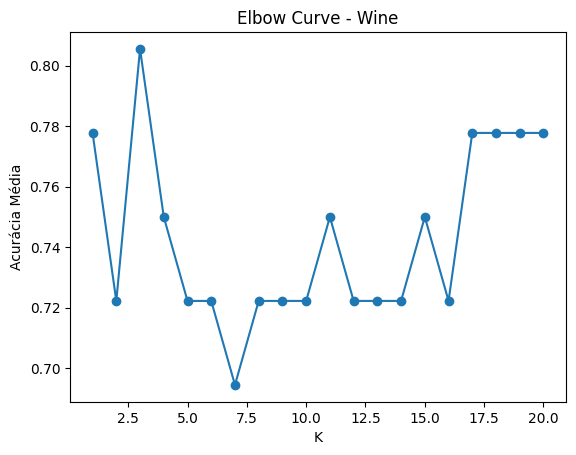

Melhor K para o dataset Wine: 3 com acurácia média de 0.8056


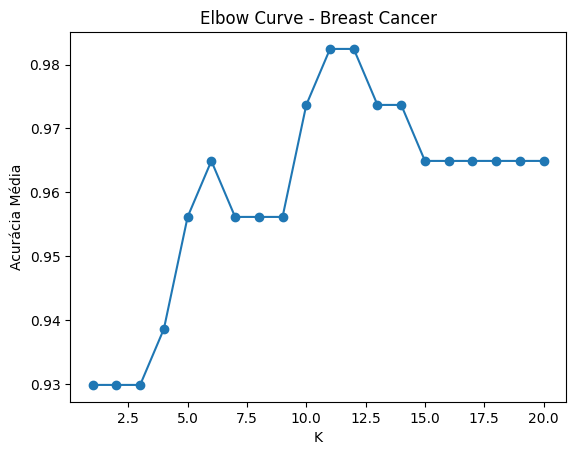

Melhor K para o dataset Breast Cancer: 11 com acurácia média de 0.9825


In [76]:
import matplotlib.pyplot as plt
from sklearn import datasets

def plot_elbow_curve(dataset, dataset_name: str, max_k=20, repetitions=1000):
    df = preparar_dataset_sklearn(dataset)
    accuracies = []

    for k in range(1, max_k + 1):
        model, X_test, y_test = construir_classificador_knn(df, k, 0.8)
        accuracy = avaliar_acuracia_knn(model, X_test, y_test, repetitions)
        accuracies.append(accuracy)

    plt.plot(range(1, max_k + 1), accuracies, marker='o')
    plt.xlabel('K')
    plt.ylabel('Acurácia Média')
    plt.title(f'Elbow Curve - {dataset_name}')
    plt.show()

    best_k = accuracies.index(max(accuracies)) + 1
    print(f"Melhor K para o dataset {dataset_name}: {best_k} com acurácia média de {max(accuracies):.4f}")
    return best_k

dataset_wine = datasets.load_wine()
best_k_wine = plot_elbow_curve(dataset_wine, 'Wine')

dataset_breast_cancer = datasets.load_breast_cancer()
best_k_cancer = plot_elbow_curve(dataset_breast_cancer, 'Breast Cancer')


### V. Regressão com K-NN

8. Considere o conjunto de dados auto-mpg contido no arquivo auto-mpg.csv, o qual está contido no Link 1 abaixo (para mais informações sobre o dataset acesse o Link 2 abaixo). Este dataset contém exemplos de atributos de veículos e o consumo de combustível como classe. Construa um Modelo Regressor K-NN para prever o consumo de combustível de um veículo medido em milhas por galão (mpg).

Obs.: Não utilize o atributo que contém os nomes dos veículos no seu modelo.
  - Link 1: https://github.com/professortiagoinfnet/inteligencia_artificial_model_lifecycle/tree/main/auto%2Bmpg
  - Link 2: https://archive.ics.uci.edu/dataset/9/auto+mpg



In [83]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

url = "https://raw.githubusercontent.com/professortiagoinfnet/inteligencia_artificial_model_lifecycle/main/auto%2Bmpg/auto-mpg.csv"
column_names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"]
df = pd.read_csv(url, names=column_names)

df = df.drop(columns=["car_name"]).replace('?', pd.NA).dropna().astype(float)

y = df["mpg"]
X = df.drop(columns=["mpg"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 3 # arbitrário
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, y_train)

y_pred = knn_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Erro Absoluto Médio (MAE): {mae:.2f}")

results = pd.DataFrame({'Actual MPG': y_test, 'Predicted MPG': y_pred})
print("\nPrevisões de MPG vs Valores Reais (primeiras 10 amostras):")
print(results.head(10))

Erro Quadrático Médio (MSE): 19.63
Erro Absoluto Médio (MAE): 3.03

Previsões de MPG vs Valores Reais (primeiras 10 amostras):
     Actual MPG  Predicted MPG
79         26.0      32.600000
276        21.6      22.733333
248        36.1      34.033333
56         26.0      32.166667
393        27.0      24.466667
205        28.0      35.333333
43         13.0      12.666667
235        26.0      26.066667
152        19.0      19.900000
117        29.0      37.800000


### VI. Avaliação de Regressor K-NN

9. Avalie o desempenho do algoritmo do Exercício 8 para 10 valores de K diferentes considerando as métricas erro quadrático médio e erro absoluto médio.

10. A partir das métricas obtidas do Exercício 9, responda com suas palavras. O desempenho do seu algoritmo foi ruim ou bom? Por que?
  - O erro absoluto médio "MAE" permaneceu relativamente baixo, abaixo de 4%, para todos os valores de K testados.  Já o erro quadrático médio "MSE" ficou entre %16.93 e %28.70, também aceitável.  Comparando os valores reais com os valores previstos pelo modelo, vemos que são bem próximos.

K=1 | MSE: 28.70 | MAE: 3.87
K=2 | MSE: 21.65 | MAE: 3.39
K=3 | MSE: 19.63 | MAE: 3.03
K=4 | MSE: 19.08 | MAE: 3.01
K=5 | MSE: 17.75 | MAE: 2.95
K=6 | MSE: 18.20 | MAE: 3.12
K=7 | MSE: 16.69 | MAE: 2.96
K=8 | MSE: 16.99 | MAE: 3.02
K=9 | MSE: 17.07 | MAE: 3.00
K=10 | MSE: 17.16 | MAE: 3.01
K=11 | MSE: 17.69 | MAE: 3.10
K=12 | MSE: 17.00 | MAE: 3.07
K=13 | MSE: 16.76 | MAE: 3.03
K=14 | MSE: 17.46 | MAE: 3.11
K=15 | MSE: 17.45 | MAE: 3.08
K=16 | MSE: 17.30 | MAE: 3.10
K=17 | MSE: 17.06 | MAE: 3.10
K=18 | MSE: 16.99 | MAE: 3.08
K=19 | MSE: 17.36 | MAE: 3.14
K=20 | MSE: 17.20 | MAE: 3.14
K=21 | MSE: 17.35 | MAE: 3.13
K=22 | MSE: 17.29 | MAE: 3.12
K=23 | MSE: 17.08 | MAE: 3.10
K=24 | MSE: 17.24 | MAE: 3.11
K=25 | MSE: 17.23 | MAE: 3.10
K=26 | MSE: 17.19 | MAE: 3.10
K=27 | MSE: 17.12 | MAE: 3.09
K=28 | MSE: 17.25 | MAE: 3.13
K=29 | MSE: 16.93 | MAE: 3.11
K=30 | MSE: 17.04 | MAE: 3.12
K=31 | MSE: 16.78 | MAE: 3.09
K=32 | MSE: 17.05 | MAE: 3.11
K=33 | MSE: 17.13 | MAE: 3.12
K=34 | MSE: 17.15 |

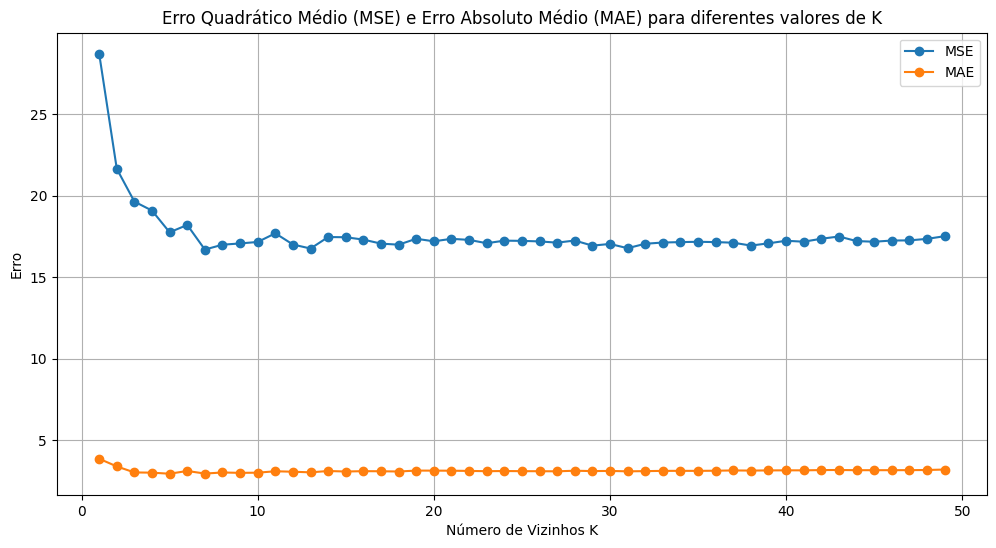

In [82]:
mse_values = []
mae_values = []

min_k = 1
max_k = 50
for k in range(min_k, max_k):
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(X_train, y_train)
    y_pred = knn_regressor.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    mse_values.append(mse)
    mae_values.append(mae)

    print(f"K={k} | MSE: {mse:.2f} | MAE: {mae:.2f}")

plt.figure(figsize=(12, 6))
plt.plot(range(min_k, max_k), mse_values, marker='o', label='MSE')
plt.plot(range(min_k, max_k), mae_values, marker='o', label='MAE')
plt.xlabel('Número de Vizinhos K')
plt.ylabel('Erro')
plt.title('Erro Quadrático Médio (MSE) e Erro Absoluto Médio (MAE) para diferentes valores de K')
plt.legend()
plt.grid(True)
plt.show()